Optimal Energy Group Indices: [23 81 62 83 66 94 26 16  6 19 72 47 40 90  7 67 34 74  3 21 18  1 51 64
 99 61 95 84 48 30 96  2  9 14 54 98 78 79 50 33 11 89 49 17 29  4  0 82
 42 87]
Optimal Signal Group Indices: [ 5  8 10 12 13 15 20 22 24 25 27 28 31 32 35 36 37 38 39 41 43 44 45 46
 52 53 55 56 57 58 59 60 63 65 68 69 70 71 73 75 76 77 80 85 86 88 91 92
 93 97]
Optimal SNR: 0.9758831630904847
Optimal Power: 22.82930338590682


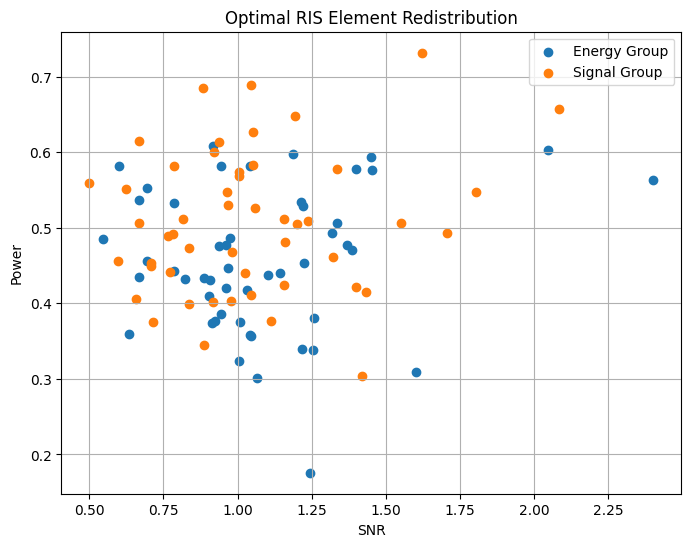

In [2]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Generate simulated data for RIS elements' characteristics (channel conditions, energy levels, signal reception)
num_elements = 100

np.random.seed(42)
elements = np.random.normal(0.5, 0.1, (num_elements, 3))

# Brute-force search for optimal redistribution using random sampling
num_samples = 1000  # Adjust the number of samples based on your computation time
best_snr = float('inf')
best_power = float('inf')
best_energy_indices = None
best_signal_indices = None

for _ in range(num_samples):
    split = np.random.choice(range(num_elements), num_elements // 2, replace=False)
    energy_indices = np.array(split)
    signal_indices = np.array(list(set(range(num_elements)) - set(energy_indices)))
    
    # Calculate SNR and power for the current grouping
    current_snr = np.sum(elements[signal_indices, 0]) / np.sum(elements[signal_indices, 2])
    current_power = np.sum(elements[energy_indices, 1])
    
    if current_snr < best_snr and current_power < best_power:
        best_snr = current_snr
        best_power = current_power
        best_energy_indices = energy_indices
        best_signal_indices = signal_indices 

# Print optimal groupings and their characteristics
print("Optimal Energy Group Indices:", best_energy_indices)
print("Optimal Signal Group Indices:", best_signal_indices)
print("Optimal SNR:", best_snr)
print("Optimal Power:", best_power)

# Visualize the efficiency
plt.figure(figsize=(8, 6))
plt.scatter(elements[best_energy_indices, 0] / elements[best_energy_indices, 2], elements[best_energy_indices, 1], label='Energy Group')
plt.scatter(elements[best_signal_indices, 0] / elements[best_signal_indices, 2], elements[best_signal_indices, 1], label='Signal Group')
plt.xlabel('SNR')
plt.ylabel('Power')
plt.title('Optimal RIS Element Redistribution')
plt.legend()
plt.grid(True)
plt.show()


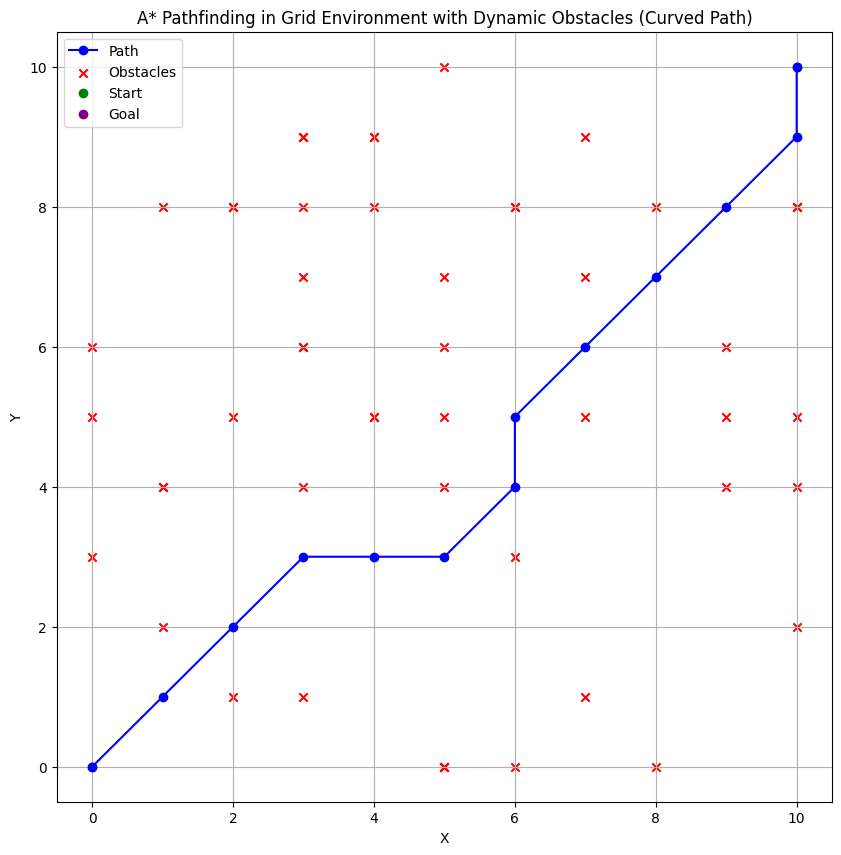

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

# Define the grid environment
grid_size = 11
num_obstacles = 50
obstacles = [(np.random.randint(0, grid_size), np.random.randint(0, grid_size)) for _ in range(num_obstacles)]
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)

# A* pathfinding with diagonal movements
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(start, goal, max_iterations=10000):
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    iterations = 0

    while open_list and iterations < max_iterations:
        current_g, current = heappop(open_list)
        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + heuristic(neighbor, goal)
                    heappush(open_list, (f_score, neighbor))

        iterations += 1

    return None

# Find optimal path using A* pathfinding
path = astar(start, goal, max_iterations=50000)

if path is not None:
    # Visualize the path and obstacles
    plt.figure(figsize=(10, 10))
    plt.plot([p[0] for p in path], [p[1] for p in path], marker='o', linestyle='-', color='blue', label='Path')
    plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
    plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
    plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('A* Pathfinding in Grid Environment with Dynamic Obstacles (Curved Path)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Path not found.")


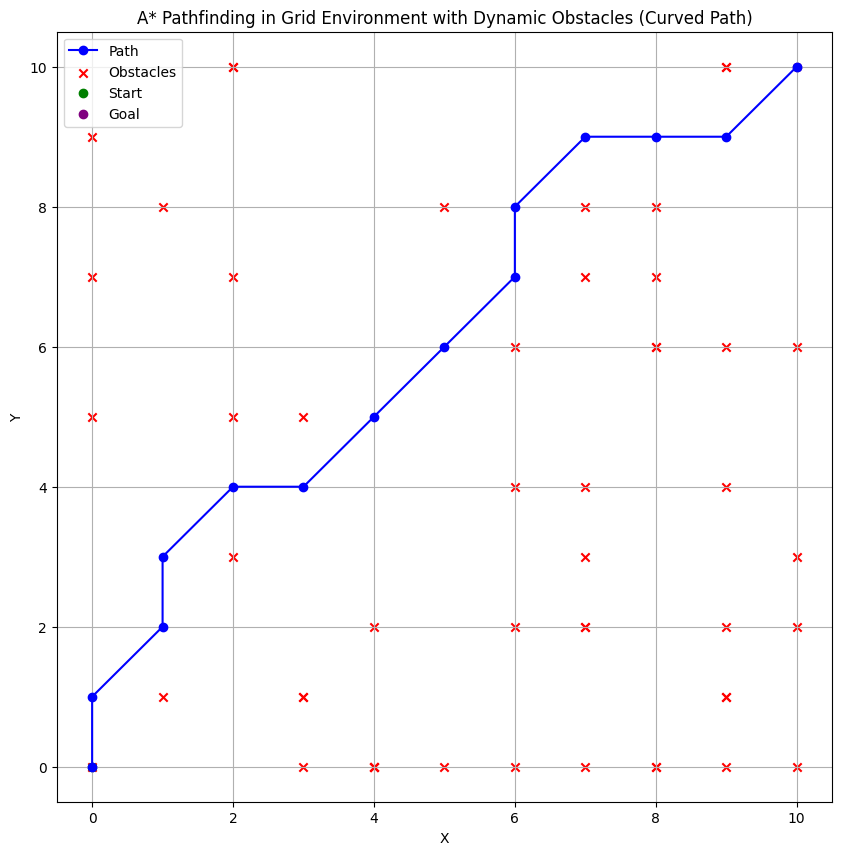

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

# Define the grid environment
grid_size = 11
num_obstacles = 50
obstacles = [(np.random.randint(0, grid_size), np.random.randint(0, grid_size)) for _ in range(num_obstacles)]
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)

# A* pathfinding with diagonal movements
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(start, goal, max_iterations=10000):
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    iterations = 0

    while open_list and iterations < max_iterations:
        current_g, current = heappop(open_list)
        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + heuristic(neighbor, goal)
                    heappush(open_list, (f_score, neighbor))

        iterations += 1

    return None

# Find optimal path using A* pathfinding
path = astar(start, goal, max_iterations=50000)

if path is not None:
    # Visualize the path and obstacles
    plt.figure(figsize=(10, 10))
    plt.plot([p[0] for p in path], [p[1] for p in path], marker='o', linestyle='-', color='blue', label='Path')
    plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
    plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
    plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('A* Pathfinding in Grid Environment with Dynamic Obstacles (Curved Path)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Path not found.")
